### GLOBAL CONFIG

In [ ]:
%load_ext autoreload
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle

PREPROCESS = False # Do a fresh preprocess
MAKE_NEW_EMBEDDING = True # If False, the stored one will be loaded
# EMB_MAX_WORDS = None
RANDOM_SEED = 456
SAVE_TRAINED_MODEL = True

PREPROCESS_INPUT = './data/training.1600000.processed.noemoticon.csv'
PREPROCESS_OUTPUT = './data/preprocessed.csv'
GLOVE_FILE = './data/glove.6B.50d.txt'
EMB_PKL = './models/emb_layer.pkl'
MODEL_PKL = './models/model.pkl'


### Preprocess data and store it

In [ ]:
from pre import preprocess

if PREPROCESS:
    preprocess(i=PREPROCESS_INPUT, o=PREPROCESS_OUTPUT, slice=10)

### Load preprocessed data

In [78]:
from parse import load_data
from sklearn.model_selection import train_test_split

data = load_data(PREPROCESS_OUTPUT)
X = data['tweet']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_SEED)

y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)
y_val = tf.keras.utils.to_categorical(y_val, 2)


In [92]:
### Create Empty model
from TextClassifierModel import load_classifier




trained_model_path = 'models/trained'
untrained_model_path = 'models/untrained'


text_classifier = load_classifier(model_path='untrained', glove_file = './data/glove.6B.50d.txt', data=data)

print(text_classifier.model.summary())


Glove data loaded
Words not found 525
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     multiple                  142450    
_________________________________________________________________
flatten_22 (Flatten)         (None, 5000)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 5000)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 64)                320064    
_________________________________________________________________
dense_56 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_57 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_58 (Dense

### Train

Epoch 1/30
11/11 [==============================] - 1s 20ms/step - loss: 2.5326 - accuracy: 0.4972 - val_loss: 1.8315 - val_accuracy: 0.5562
Epoch 2/30
11/11 [==============================] - 0s 8ms/step - loss: 1.6945 - accuracy: 0.5831 - val_loss: 1.3851 - val_accuracy: 0.5813
Epoch 3/30
11/11 [==============================] - 0s 8ms/step - loss: 1.3055 - accuracy: 0.6232 - val_loss: 1.1942 - val_accuracy: 0.6000
Epoch 4/30
11/11 [==============================] - 0s 10ms/step - loss: 1.1231 - accuracy: 0.6310 - val_loss: 1.0792 - val_accuracy: 0.6000
Epoch 5/30
11/11 [==============================] - 0s 10ms/step - loss: 0.9991 - accuracy: 0.7000 - val_loss: 1.0526 - val_accuracy: 0.5500
Epoch 6/30
11/11 [==============================] - 0s 9ms/step - loss: 0.9135 - accuracy: 0.6910 - val_loss: 1.0317 - val_accuracy: 0.5437
Epoch 7/30
11/11 [==============================] - 0s 8ms/step - loss: 0.8332 - accuracy: 0.7227 - val_loss: 1.0305 - val_accuracy: 0.5250
Epoch 8/30
11/11 

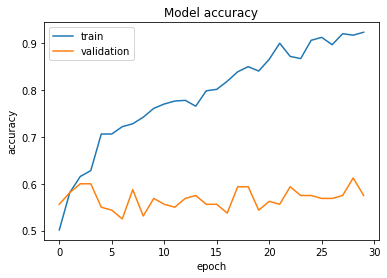

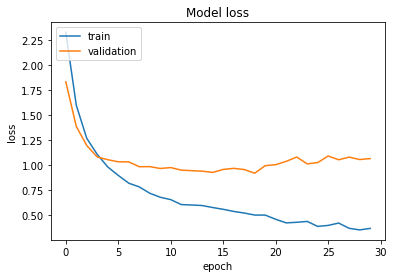

In [93]:
%autoreload 2
from evaluation import plot_history

history = text_classifier.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=60, epochs=30, verbose=1)
plot_history(history)


In [ ]:
### Save trained model

In [ ]:
from TextClassifierModel import save_classifier
save_classifier(text_classifier, 'models/trained')

In [ ]:
# with open(MODEL_PKL, 'rb') as input:
#     model = pickle.load(input)

### Evaluate production (forbidden during tuning)

In [ ]:
from evaluation import evaluate_model

evaluate_model(model.model, X_test, y_test)

### Explain prediction

In [ ]:
import eli5
from eli5.lime import TextExplainer

te = TextExplainer(random_state=42)
te.fit("I love candy. I like to be positive, be happy! What a lovely day", model.predict_proba)
te.show_prediction()